In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [2]:
def compute_K(T, beta1, beta2):
    K = beta1 / T + beta2
    return K

In [3]:
npts_int = 10

case_name = "T_ref-N%d"%(npts_int)
dat_fname = "%s.npy"%(case_name)
grid_T = np.load(dat_fname)

nit = 10
case_name = "K_adj-N%d-It%d"%(npts_int, nit)
dat_fname = "%s.npy"%(case_name)
grid_K_it10 = np.load(dat_fname)
nit = 100
case_name = "K_adj-N%d-It%d"%(npts_int, nit)
dat_fname = "%s.npy"%(case_name)
grid_K_it100 = np.load(dat_fname)

In [4]:
npts_ = npts_int + 1
bnd_x_l = 0.0
bnd_x_h = 1.0
bnd_y_l = 0.0
bnd_y_h = 1.0
grid_1d = np.linspace(bnd_x_l, bnd_x_h, npts_)
dx = grid_1d[1] - grid_1d[0]
dy = grid_1d[1] - grid_1d[0]
grid_x, grid_y = np.meshgrid(grid_1d, grid_1d)

In [5]:
beta1_ref = 13221.0
beta2_ref = 27.0
grid_K_ref = compute_K(grid_T, beta1_ref, beta2_ref)

In [6]:
K_dif_it10 = grid_K_ref - grid_K_it10
K_dif_it100 = grid_K_ref - grid_K_it100

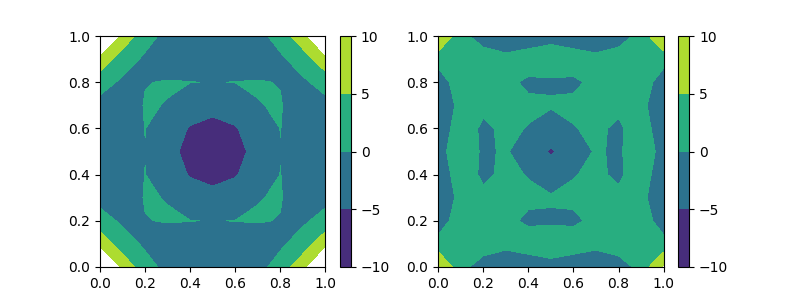

In [7]:
fig = plt.figure(figsize=(8,3))
cntf_levels = np.linspace(-10,10,5)
ax1 = fig.add_subplot(1, 2, 1)
CS1 = ax1.contourf(grid_x, grid_y, K_dif_it10, levels=cntf_levels)
cbar2 = fig.colorbar(CS1)
ax2 = fig.add_subplot(1, 2, 2)
CS2 = ax2.contourf(grid_x, grid_y, K_dif_it100, levels=cntf_levels)
cbar2 = fig.colorbar(CS2)

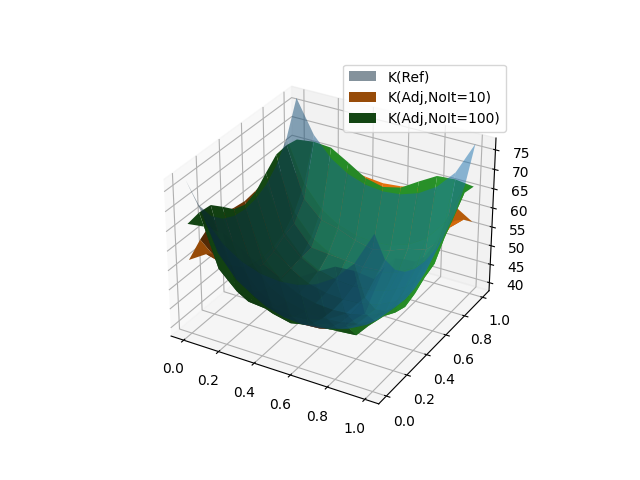

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(grid_x, grid_y, grid_K_ref, alpha=0.5, label="K(Ref)")
surf._facecolors2d=surf._facecolor3d
surf._edgecolors2d=surf._edgecolor3d
surf = ax.plot_surface(grid_x, grid_y, grid_K_it10, label="K(Adj,NoIt=10)")
surf._facecolors2d=surf._facecolor3d
surf._edgecolors2d=surf._edgecolor3d
surf = ax.plot_surface(grid_x, grid_y, grid_K_it100, label="K(Adj,NoIt=100)")
surf._facecolors2d=surf._facecolor3d
surf._edgecolors2d=surf._edgecolor3d
ax.legend()
#  fig_fname = "%s.png"%(case_name)
#  plt.savefig(fig_fname)
#  print("%s is saved"%(fig_fname))